In [1]:
# Creating a function to solve the summation we discovered in my assignment 

import random

def s(n):
    total = 0
    for i in range(n):
        i +=1
        total += 1 / (2*i - 1)
        
    return total

print('Inputting a random number between 1-100 into my summation formula: \n')
x = random.randint(1,100)
print('The random number is:', x,'\n')
print('The summation is therefore:', s(x))


Inputting a random number between 1-100 into my summation formula: 

The random number is: 27 

The summation is therefore: 2.629702017118228


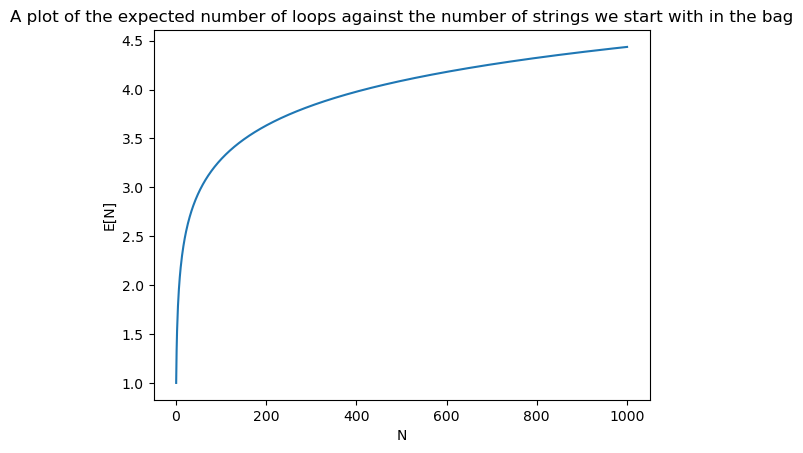

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the expected number of loops against N we get
def plotter(length):
    N = list(range(1,length+1))
    vals = []
    for i in range(1,length+1):
        vals.append(s(i))
    
    #plt.figure(figsize=(3,3))
    plt.plot(N,vals)
    plt.xlabel('N')
    plt.ylabel('E[N]')
    plt.title('A plot of the expected number of loops against the number of strings we start with in the bag')
    plt.show()
    
plotter(1000)


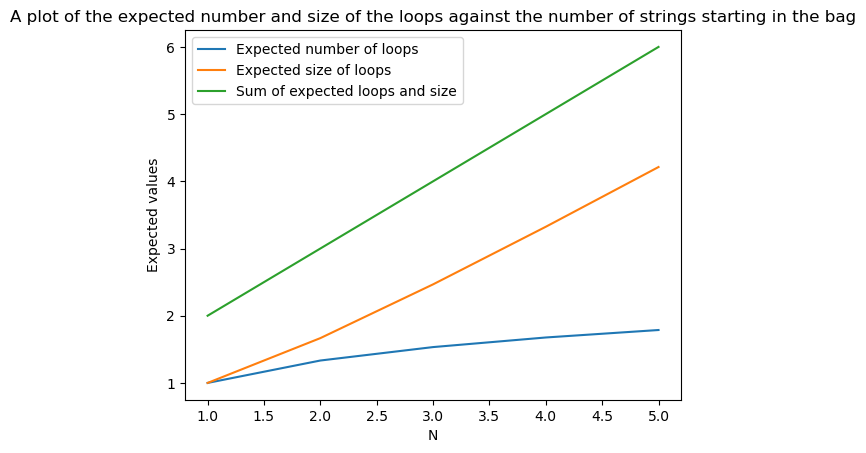

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def v(n): #Calculating the expected length of the loops
    total = 1
    for i in range(n):
        i +=1
        total += (2*i-2) / (2*i - 1)
        
    return total


def both(length): #Plotting expected length and size of loop and their sum
    N = list(range(1,length+1))
    vals1 = []
    vals2 = []
    vals3 = []
    for i in range(1,length+1):
        vals1.append(s(i))
        vals2.append(v(i))
        vals3.append(s(i)+v(i))
        

    
    plt.plot(N,vals1,label='Expected number of loops')
    plt.plot(N,vals2,label='Expected size of loops')
    plt.plot(N,vals3,label='Sum of expected loops and size')
    plt.xlabel('N')
    plt.ylabel('Expected values')
    plt.title('A plot of the expected number and size of the loops against the number of strings starting in the bag')
    plt.legend()
    plt.show()
    
both(5)


The expected number of loops is: 1.5274472552744724


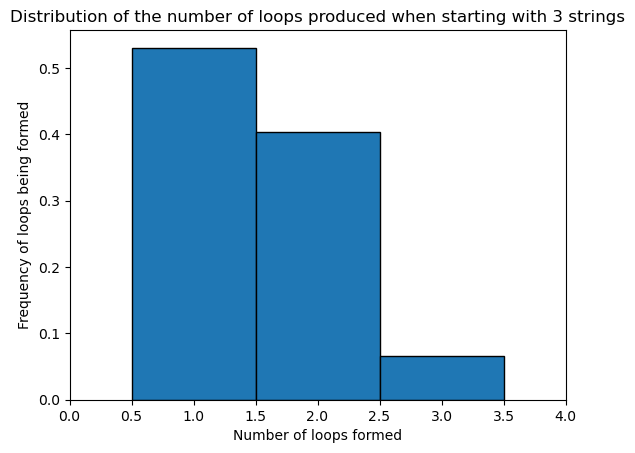

The expected number of loops is: 3.2776722327767223


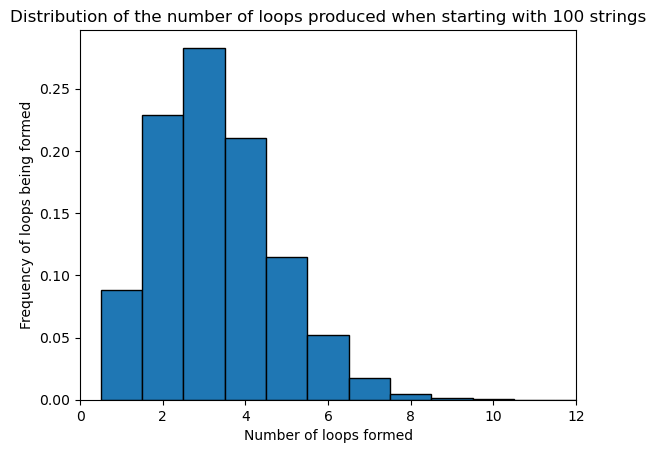

The expected number of loops is: 4.4361563843615635


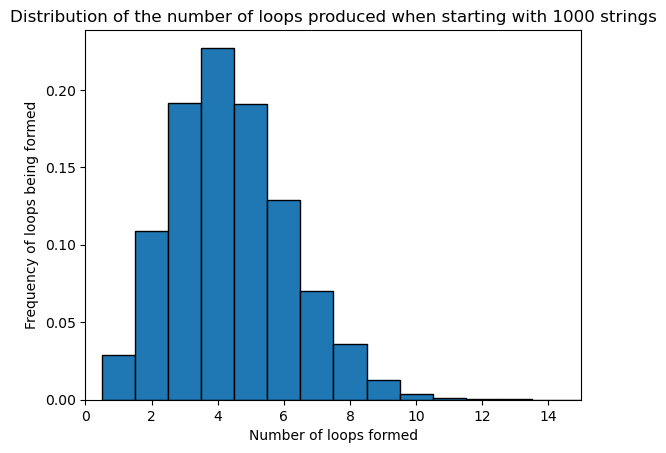

In [4]:
from collections import Counter

runs = 10000
N=100

def knots(length): # Modelling the game, length is the number of strings
    strings = list(range(1,length+1))
    loops = 0 
    while strings:
        x = random.choice(strings)
        
        y = random.randint(1,2*len(strings)-1)

        if y==1:  # Since this is all done WLOG we can symbol y==1 as it being the same string
            loops +=1 
            strings.remove(x)
    
        else:
            strings.remove(x)
        
    return loops

def hist(N,xlim):  #Plotting the histogram (I change my mind and use a bar chart)
    total_loops=0
    for i in range(runs):
        x = knots(N)
        total_loops+=x
    
    print('The expected number of loops is:',total_loops/(runs+1))

    loop = []
    for i in range(runs):
        loop.append(knots(N))
    
    vals = list(range(1,N+1))
    probability = []

    c = Counter(loop) #Count the number of each different types of loops formed

    for i in vals:
        count = c[i]
        prob = count/(runs+1)
        probability.append(prob) #Therefore find the frequency or probability of each number of diffferent loops formed
    
    plt.bar(vals,probability,width=1,edgecolor='k') #Plot it is a bar chart
    plt.xlabel('Number of loops formed')
    plt.ylabel('Frequency of loops being formed')
    string = str('Distribution of the number of loops produced when starting with '+str(N)+' strings')
    plt.title(string)
    plt.xlim(0,xlim)
    plt.show()
    
hist(3,4)
hist(100,12)
hist(1000,15)
    
